[*********************100%***********************]  1 of 1 completed


C:\Users\westo\AppData\Local\Temp\ipykernel_22592\2145778520.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = labels


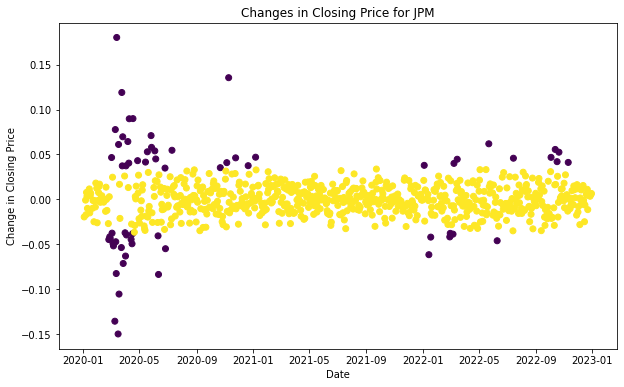

In [25]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for desired ticker symbol
ticker = 'JPM'
data = yf.download(ticker, start='2020-01-01', end='2022-12-31')

# Calculate the percentage change in closing price
data['Change'] = data['Close'].pct_change()

# Drop any NaN values
data = data.dropna()

# Reshape the data
X = data['Change'].values.reshape(-1,1)

# Fit a Gaussian Mixture Model with the number of distributions
gmm = GaussianMixture(n_components=2)
gmm.fit(X)

# Predict the labels for the data samples in X using GMM
labels = gmm.predict(X)

# Add the labels to the data DataFrame
data['Label'] = labels

# Plot the changes in closing price, colored by the GMM labels
plt.figure(figsize=(10,6))
plt.scatter(data.index, data['Change'], c=data['Label'], cmap='viridis')
plt.title('Changes in Closing Price for ' + ticker)
plt.xlabel('Date')
plt.ylabel('Change in Closing Price')
plt.show()


S&P500 Stock download
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,146.529999,146.990005,143.880005,144.929993,106.343781,204935600
2008-01-03,144.910004,145.490005,144.070007,144.860001,106.292435,125133300
2008-01-04,143.339996,143.440002,140.910004,141.309998,103.687584,232330900
2008-01-07,141.809998,142.229996,140.100006,141.190002,103.599503,234991000
2008-01-08,142.080002,142.899994,138.440002,138.910004,101.926567,326365700
...,...,...,...,...,...,...
2024-01-10,474.160004,477.450012,473.869995,476.559998,476.559998,67310600
2024-01-11,477.589996,478.119995,472.260010,476.350006,476.350006,77940700
2024-01-12,477.839996,478.600006,475.230011,476.679993,476.679993,57944000


NameError: name 'inflation' is not defined